In [2]:
import torch
import numpy as np
import pandas
import re

pandas.set_option('display.max_columns', None)

In [3]:
import matplotlib.pyplot as plt
# import matplotlib_tufte
# matplotlib_tufte.setup()

In [4]:
# Run these in the terminal to generate the features
# !mkdir -p data/generated
# !python -m bread.algo.lineage.nn.preprocess --segmentations "data/raw/colony00[2345]_segmentation.h5" --lineages "data/raw/colony00[2345]_lineage.csv" --out data/generated/data_train.pt --scale-length 0.108332 --scale-time 5
# !python -m bread.algo.lineage.nn.preprocess --segmentations "data/raw/colony00[1]_segmentation.h5" --lineages "data/raw/colony00[1]_lineage.csv" --out data/generated/data_test.pt --scale-length 0.108332 --scale-time 5

In [5]:
data = torch.load('../../data/generated/data_train.pt')[
    'data'] + torch.load('../../data/generated/data_test.pt')['data']
x = torch.cat([d['x'] for d in data], dim=0)
y = torch.cat([d['y'] for d in data])  # is_budding
bud_ids = torch.cat([d['bud_id'] for d in data])
time_ids = torch.cat([d['time_id'] for d in data])
time_since_budding = torch.cat([d['time_since_budding'] for d in data])
num_nn = torch.cat([d['num_nn'] for d in data])
candidate_ids = torch.cat([d['candidate_id'] for d in data])
colony_ids = torch.cat([torch.tensor([int(re.findall('(?:.*colony)(\d\d\d)(?:_.*)',
                       str(d['fp_segmentation']))[0])] * len(d['y'])) for d in data]).squeeze()

# Examine correlations


In [6]:
df = pandas.DataFrame(
    x.numpy(),
    columns=[
        'bud_area', 'bud_r_equiv', 'bud_ecc', 'bud_maj_x', 'bud_maj_y', 'bud_maj_arg',
        'candidate_area', 'candidate_r_equiv', 'candidate_ecc', 'candidate_maj_x', 'candidate_maj_y', 'candidate_maj_arg',
        'majmaj_angle', 'majbudpt_angle', 'cmtocm_budmaj_angle', 'dist', 'expspeed',
        'cmtocm_x', 'cmtocm_y', 'cmtocm_arg', 'cmtocm_len',
        'budpt_x', 'budpt_y', 'budpt_arg', 'budpt_len',
    ])

df['is_budding'] = y.numpy()
df['bud_id'] = bud_ids.numpy()
df['time_id'] = time_ids.numpy()
df['candidate_id'] = candidate_ids.numpy()
df['colony_id'] = colony_ids.numpy()
df['time_since_budding'] = time_since_budding.numpy()
df['num_nn'] = num_nn.numpy()

In [7]:
df.head(10)

,bud_area,bud_r_equiv,bud_ecc,bud_maj_x,bud_maj_y,bud_maj_arg,candidate_area,candidate_r_equiv,candidate_ecc,candidate_maj_x,candidate_maj_y,candidate_maj_arg,majmaj_angle,majbudpt_angle,cmtocm_budmaj_angle,dist,expspeed,cmtocm_x,cmtocm_y,cmtocm_arg,cmtocm_len,budpt_x,budpt_y,budpt_arg,budpt_len,is_budding,bud_id,time_id,candidate_id,colony_id,time_since_budding,num_nn
0,0.287528,0.323546,0.877888,0.141323,0.989964,1.428999,21.840364,2.641840,0.539224,-0.944408,0.328776,2.806585,1.377586,0.305312,1.426413,0.108332,0.089993,-3.109353,-0.008041,3.109363,-3.139007,-2.682622,0.079684,2.683805,3.111898,1,3,3,1,5,0,1
1,1.144243,0.614065,0.784043,-0.218360,0.975868,1.790930,24.351831,2.791160,0.547690,-0.721672,0.692235,2.377011,0.586080,0.721774,1.321787,0.216664,0.088608,-3.256091,0.094048,3.257449,3.112717,-2.604133,0.111546,2.606521,3.098785,1,3,4,1,5,1,1
2,2.388240,0.884506,0.643626,-0.219541,0.975603,1.792140,23.659418,2.756570,0.538841,-0.708852,0.705357,2.358666,0.566526,0.799345,1.347005,0.324996,0.059940,-3.577499,0.008755,3.577509,3.139145,-2.536636,-0.041652,2.536978,-3.125174,1,3,5,1,5,2,1
3,3.497275,1.076747,0.592314,-0.094205,0.995553,1.665142,23.700493,2.756307,0.537109,-0.787651,0.616122,2.477783,0.812642,0.653435,1.474118,0.216664,0.064494,-3.786146,0.008831,3.786156,3.139260,-2.660930,0.027607,2.661073,3.131218,1,3,6,1,5,3,1
4,4.301179,1.179322,0.318848,-0.178941,0.983860,1.750706,20.713726,2.574849,0.583315,-0.913133,0.407663,2.721700,0.970994,0.365066,1.361689,0.324996,0.056979,-3.989843,0.116527,3.991544,3.112395,-2.604771,0.142954,2.608691,3.086766,1,3,7,1,5,4,1
5,2.828333,1.013181,0.772418,-0.997673,0.068185,3.073354,27.227108,2.950905,0.522223,-0.803373,0.595476,2.503735,0.569620,0.711147,1.292967,0.324996,0.061591,0.826706,-3.886441,3.973395,-1.361205,0.634992,-2.815907,2.886615,-1.349004,1,4,23,1,5,0,1
6,5.955930,1.400306,0.496265,0.964981,0.262319,0.265424,23.853058,2.759329,0.599402,-0.826075,0.563560,2.542904,0.864113,0.691737,1.510787,0.216664,0.030711,0.822088,-3.945643,4.030375,-1.365382,0.729913,-2.534811,2.637809,-1.290426,1,4,24,1,5,1,1
7,4.213160,1.168421,0.559428,-0.163687,0.986512,1.735223,24.011492,2.768402,0.605794,-0.794087,0.607804,2.488300,0.753077,0.595755,0.115602,0.108332,0.063836,1.146659,-3.987195,4.148801,-1.290768,0.889035,-2.667128,2.811397,-1.249048,1,4,25,1,5,2,1
8,5.298724,1.304561,0.350293,0.625787,0.779994,0.894657,25.578224,2.858014,0.573493,-0.818557,0.574425,2.529691,1.506559,0.590864,0.958041,0.216664,0.056374,1.177588,-4.066056,4.233146,-1.288895,1.000701,-2.595190,2.781441,-1.202767,1,4,26,1,5,3,1
9,6.619004,1.462856,0.212686,0.936010,0.351972,0.359677,24.610020,2.804706,0.605289,-0.836005,0.548722,2.560758,0.940512,0.675111,1.465854,0.216664,0.073868,1.078540,-4.141981,4.280100,-1.316061,0.831237,-2.552279,2.684229,-1.255946,1,4,27,1,5,4,1


# Examine correlations


In [8]:
# correlations with the training target `is_budding`
df\
    .loc[:, ~df.columns.isin(['bud_id', 'time_id', 'candidate_id', 'colony_id', 'num_nn', 'time_since_budding'])]\
    .corr()\
    .is_budding\
    .abs()\
    .sort_values(ascending=False)

is_budding             1.000000
majbudpt_angle         0.333748
dist                   0.255006
budpt_arg              0.183198
majmaj_angle           0.148668
candidate_r_equiv      0.143445
candidate_ecc          0.107840
candidate_area         0.079892
bud_r_equiv            0.078054
cmtocm_arg             0.071813
cmtocm_y               0.070010
budpt_y                0.067933
bud_area               0.055129
budpt_len              0.036263
cmtocm_budmaj_angle    0.031467
cmtocm_len             0.030392
expspeed               0.024408
candidate_maj_y        0.022128
candidate_maj_x        0.020185
bud_maj_y              0.017249
candidate_maj_arg      0.016623
bud_ecc                0.007931
budpt_x                0.006438
bud_maj_x              0.006259
cmtocm_x               0.003842
bud_maj_arg            0.003799
Name: is_budding, dtype: float64

## Debug some features


In [9]:
df[(df.cmtocm_budmaj_angle > np.pi/2*0.99) & (df.colony_id == 3)]

,bud_area,bud_r_equiv,bud_ecc,bud_maj_x,bud_maj_y,bud_maj_arg,candidate_area,candidate_r_equiv,candidate_ecc,candidate_maj_x,candidate_maj_y,candidate_maj_arg,majmaj_angle,majbudpt_angle,cmtocm_budmaj_angle,dist,expspeed,cmtocm_x,cmtocm_y,cmtocm_arg,cmtocm_len,budpt_x,budpt_y,budpt_arg,budpt_len,is_budding,bud_id,time_id,candidate_id,colony_id,time_since_budding,num_nn
350,2.347164,0.874182,0.442189,0.548647,0.836054,0.990052,21.406139,2.620131,0.354400,-0.951876,0.306485,2.830095,1.301550,0.261055,1.567128,0.242238,0.057751,2.972480,-1.966276,3.563970,-0.584413,2.129310,-1.372503,2.533323,-0.572553,1,5,41,4,3,2,1
373,1.261601,0.646097,0.682690,-0.126310,0.991991,1.697445,21.476555,2.617563,0.600041,0.961908,0.273374,0.276899,1.420546,0.132545,1.564106,0.242238,0.069150,-3.583309,-0.480644,3.615401,-3.008255,-2.776113,-0.403549,2.805291,-2.997239,1,9,62,6,3,1,1
397,2.828333,0.989550,0.580088,-0.443678,0.896186,2.030495,19.457993,2.491663,0.565322,-0.534106,0.845417,2.134247,0.103752,1.434616,1.560934,0.242238,0.050209,-2.889808,-1.466326,3.240540,-2.672032,-1.973769,-0.898698,2.168737,-2.714323,0,11,65,5,3,2,2
463,2.441051,0.922858,0.622285,-0.677723,0.735318,2.315457,23.923473,2.775360,0.675801,-0.970913,0.239431,2.899813,0.584355,0.880467,1.564014,0.306409,0.044057,2.556117,2.388170,3.498155,0.751443,2.015546,1.496554,2.510398,0.638687,0,17,89,6,3,3,3
492,2.141788,0.837463,0.613745,0.241701,0.970351,1.326678,16.899584,2.328222,0.600396,-0.994492,0.104813,3.036587,1.431684,0.116525,1.566611,0.216664,0.041457,3.250171,-0.795139,3.346021,-0.239932,2.321791,-0.522932,2.379952,-0.221531,1,21,100,12,3,4,1
509,2.798994,0.990514,0.671933,0.998485,0.055020,0.055048,35.847069,3.384422,0.415283,-0.917511,0.397709,2.732574,0.464067,1.045288,1.562009,0.324996,0.071330,0.201704,-4.357058,4.361724,-1.524536,0.376927,-3.221084,3.243062,-1.454307,1,23,104,1,3,2,3
530,2.458655,0.913763,0.804903,-0.525816,0.850598,2.124471,28.441765,3.028678,0.423317,0.992609,0.121355,0.121655,1.138777,0.392676,1.558654,0.153205,0.034323,-3.281560,-2.084060,3.887408,-2.575776,-2.626277,-1.484001,3.016553,-2.627261,0,25,107,3,3,2,3
537,3.743727,1.109675,0.764554,-0.565739,0.824584,2.172126,26.399733,2.923888,0.485319,-0.559830,0.828607,2.164977,0.007148,1.529381,1.570316,0.242238,0.044276,2.995133,2.052817,3.631098,0.600849,2.033718,1.500317,2.527243,0.635597,0,25,109,7,3,4,3
542,3.919765,1.137637,0.623877,0.999998,0.002147,0.002147,11.483502,1.924766,0.433847,0.958656,0.284569,0.288556,0.286410,1.265929,1.560789,0.216664,0.066274,-0.022949,-2.919408,2.919498,-1.578657,-0.027666,-1.695991,1.696217,-1.587107,0,26,107,22,3,1,2
553,6.272797,1.425601,0.505547,0.989544,0.144231,0.144736,25.490206,2.859538,0.659734,0.793660,0.608362,0.653995,0.509259,0.956917,1.567515,0.216664,0.059162,0.562599,-3.950678,3.990535,-1.429342,0.101124,-2.519484,2.521512,-1.530681,1,27,111,6,3,4,1


## Pair features


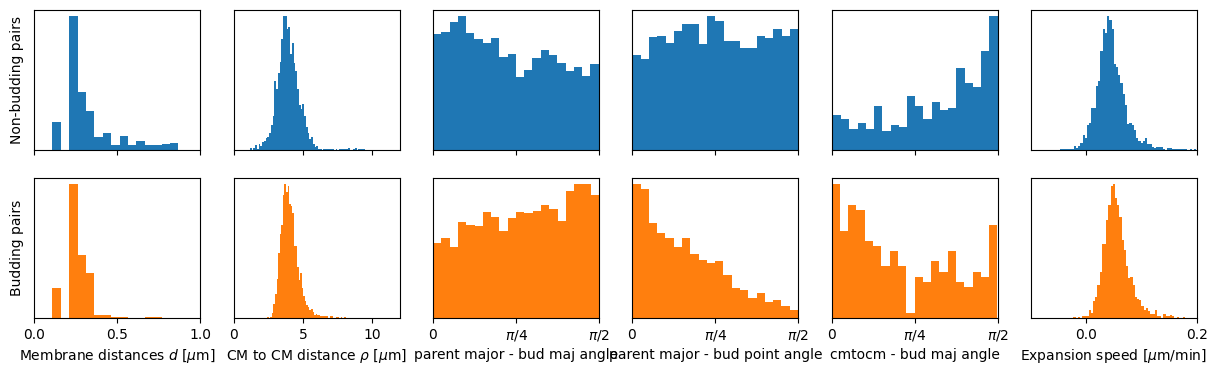

In [84]:
fig, ax = plt.subplots(ncols=6, nrows=2, sharex='col', figsize=(2.5*6, 4))

ax[0, 0].hist(x[y == 0, 15], bins=15, density=True, color='tab:blue')
ax[1, 0].hist(x[y == 1, 15], bins=15, density=True, color='tab:orange')
ax[1, 0].set_xlim((0, 1))
ax[1, 0].set_xlabel('Membrane distances $d$ [$\\mu$m]')

ax[0, 1].hist(x[y == 0, 19], bins='auto', density=True, color='tab:blue')
ax[1, 1].hist(x[y == 1, 19], bins='auto', density=True, color='tab:orange')
ax[1, 1].set_xlim((0, 12))
ax[1, 1].set_xlabel('CM to CM distance $\\rho$ [$\\mu$m]')

ax[0, 2].hist(x[y == 0, 12], bins=20, density=True, color='tab:blue')
ax[1, 2].hist(x[y == 1, 12], bins=20, density=True, color='tab:orange')
ax[1, 2].set_xlim((0, np.pi/2))
ax[1, 2].set_xticks([0, np.pi/4, np.pi/2])
ax[1, 2].set_xticklabels(['$0$', '$\\pi/4$', '$\\pi/2$'])
ax[1, 2].set_xlabel('parent major - bud maj angle')

ax[0, 3].hist(x[y == 0, 13], bins=20, density=True, color='tab:blue')
ax[1, 3].hist(x[y == 1, 13], bins=20, density=True, color='tab:orange')
ax[1, 3].set_xlim((0, np.pi/2))
ax[1, 3].set_xticks([0, np.pi/4, np.pi/2])
ax[1, 3].set_xticklabels(['$0$', '$\\pi/4$', '$\\pi/2$'])
ax[1, 3].set_xlabel('parent major - bud point angle')

ax[0, 4].hist(x[(y == 0) & (num_nn == 3) & (time_since_budding >=
              3), 14], bins=20, density=True, color='tab:blue')
ax[1, 4].hist(x[(y == 1) & (num_nn == 3) & (time_since_budding >=
              3), 14], bins=20, density=True, color='tab:orange')
ax[1, 4].set_xlim((0, np.pi/2))
ax[1, 4].set_xticks([0, np.pi/4, np.pi/2])
ax[1, 4].set_xticklabels(['$0$', '$\\pi/4$', '$\\pi/2$'])
ax[1, 4].set_xlabel('cmtocm - bud maj angle')

ax[0, 5].hist(x[y == 0, 16], bins='auto', density=True, color='tab:blue')
ax[1, 5].hist(x[y == 1, 16], bins='auto', density=True, color='tab:orange')
ax[1, 5].set_xlim((-0.1, 0.2))
ax[1, 5].set_xlabel('Expansion speed [$\\mu$m/min]')

ax[0, 0].set_ylabel('Non-budding pairs')
ax[1, 0].set_ylabel('Budding pairs')

for ax_ in ax.flat:
    ax_.yaxis.set_major_locator(plt.NullLocator())
    ax_.yaxis.set_major_locator(plt.NullLocator())

plt.show()

Hypotheses for cmtocm - budmaj

-   sphere packing on a lattice, pref 0 or pi/2. -> tweak `num_nn`
-   the shape of the bud segmentation which hugs the parent cell -> artefact which should vanish for large `time_since_budding`. if time_since_budding == 1, the bud is small and the angle is around pi/2. with larger buds, we also get a peak around 0

`(num_nn == 1) & (time_since_budding == any)` -> peak at pi/2 in the budding pairs

`(num_nn == 3) & (time_since_budding >= 3)` -> densely packed and old buds ; peak at pi/2 in non budding pairs, peak at 0 and pi/2 in budding pairs

when looking at budmaj, we can see that increasing time_since_budding makes the peak larger


## Manual boundary for pair features ?


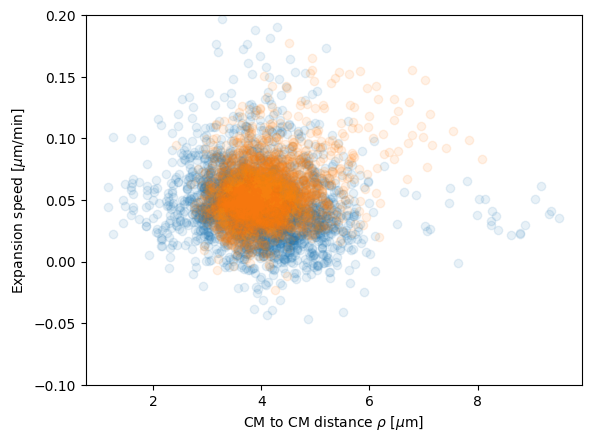

In [11]:
fig, ax = plt.subplots()

ax.scatter(x[y == 0, 19], x[y == 0, 16], color='tab:blue', alpha=0.1)
ax.scatter(x[y == 1, 19], x[y == 1, 16], color='tab:orange', alpha=0.1)
ax.set_xlabel('CM to CM distance $\\rho$ [$\\mu$m]')
ax.set_ylabel('Expansion speed [$\\mu$m/min]')
ax.set_ylim((-0.1, 0.2))

plt.show()

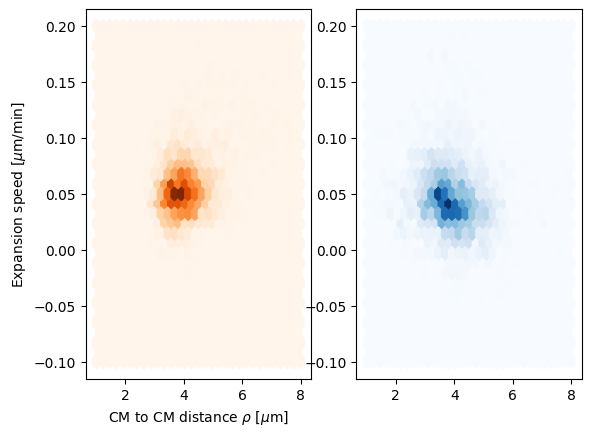

In [12]:
fig, ax = plt.subplots(ncols=2)

ax[0].hexbin(x[y == 1, 19], x[y == 1, 16], cmap='Oranges',
             extent=(1, 8, -0.1, 0.2), gridsize=30)
ax[1].hexbin(x[y == 0, 19], x[y == 0, 16], cmap='Blues',
             extent=(1, 8, -0.1, 0.2), gridsize=30)
ax[0].set_xlabel('CM to CM distance $\\rho$ [$\\mu$m]')
ax[0].set_ylabel('Expansion speed [$\\mu$m/min]')
# ax.set_ylim((-0.1, 0.2))

plt.show()

_Note : there are a lot of outliers_


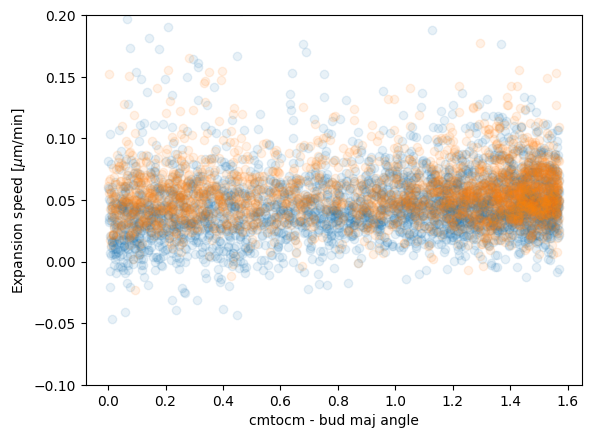

In [13]:
fig, ax = plt.subplots()

ax.scatter(x[y == 0, 14], x[y == 0, 16], color='tab:blue', alpha=0.1)
ax.scatter(x[y == 1, 14], x[y == 1, 16], color='tab:orange', alpha=0.1)
ax.set_xlabel('cmtocm - bud maj angle')
ax.set_ylabel('Expansion speed [$\\mu$m/min]')
ax.set_ylim((-0.1, 0.2))

plt.show()

--> there is no linear separation boundary, and a lot of overlap, so we can't expect simple models (e.g. one layer logistic regression) to work well


## Cell features


## Debugging the angles


In [14]:
def vec_hist(vecs):
    fig, ax = plt.subplots(ncols=5, figsize=(2.5*5, 2))

    ax[0].hist(vecs[:, 0], bins=30)
    ax[0].set_title('x')
    ax[1].hist(vecs[:, 1], bins=30)
    ax[1].set_title('y')
    ax[2].hist(torch.arccos(vecs[:, 0]), bins=30)
    ax[2].set_title('arccos(x)')
    ax[3].hist(torch.arcsin(vecs[:, 1]), bins=30)
    ax[3].set_title('arcsin(y)')
    ax[4].hist(torch.atan2(vecs[:, 1], vecs[:, 0]), bins=30)
    ax[4].set_title('atan2(y, x)')

    plt.show()

In [15]:
def vecdot_hist(vecs1, vecs2):
    fig, ax = plt.subplots(ncols=4, figsize=(2.5*4, 2))

    dots = torch.sum(vecs1 * vecs2, dim=-1)
    absdots = torch.abs(dots)
    acosabsdots = torch.arccos(absdots)
    acosdots = torch.arccos(dots)

    ax[0].hist(dots, bins=30)
    ax[0].set_title('x.y')
    ax[1].hist(absdots, bins=30)
    ax[1].set_title('|x.y|')
    ax[2].hist(acosabsdots, bins=30)
    ax[2].set_title('arccos(|x.y|)')
    ax[3].hist(acosdots, bins=30)
    ax[3].set_title('arccos(x.y)')

    plt.show()

In [16]:
budpt = x[:, 21:23] / x[:, 23][:, None]
budpt_sym = budpt.clone()
# applying symmetry manually does not change the results arccos(|x.y|) that we are looking at
# budpt_sym[budpt_sym[:, 1] < 0, :] = -budpt_sym[budpt_sym[:, 1] < 0, :]

cmtocm = x[:, 17:19] / x[:, 19][:, None]
cmtocm_sym = cmtocm.clone()
# cmtocm_sym[cmtocm_sym[:, 1] < 0, :] = -cmtocm_sym[cmtocm_sym[:, 1] < 0, :]

budmaj = x[:, 3:5]
candmaj = x[:, 9:11]

parent major - bud maj angle


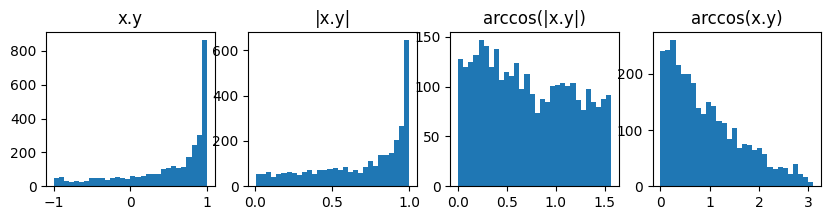

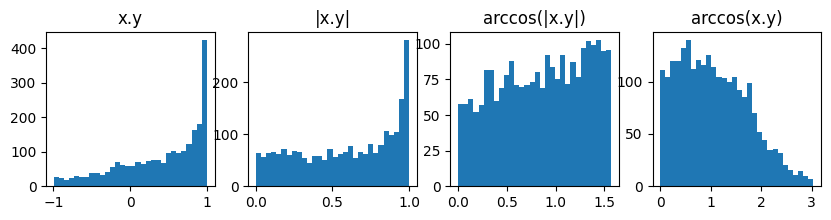

In [17]:
vecdot_hist(budmaj[y == 0], candmaj[y == 0])
vecdot_hist(budmaj[y == 1], candmaj[y == 1])

parent major - bud point angle


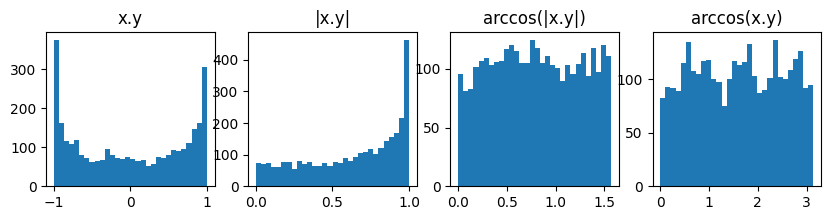

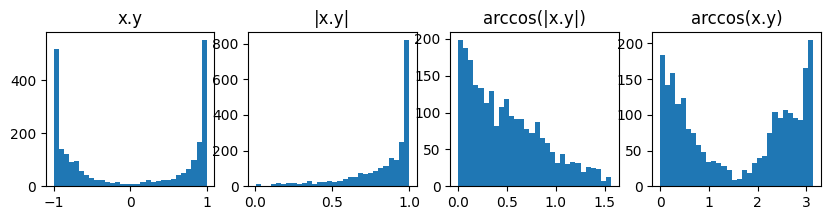

In [18]:
vecdot_hist(budpt[y == 0], candmaj[y == 0])
vecdot_hist(budpt[y == 1], candmaj[y == 1])

In [19]:
# vecdot_hist(budpt_sym[y == 0], candmaj[y == 0])
# vecdot_hist(budpt_sym[y == 1], candmaj[y == 1])

cmtocm - bud maj angle


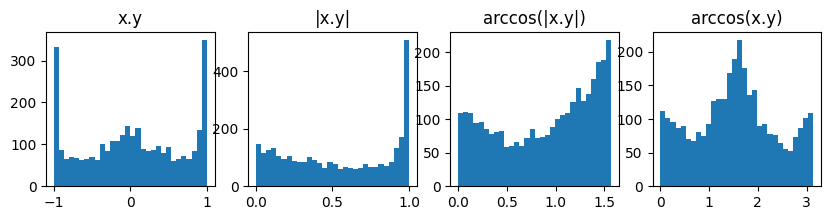

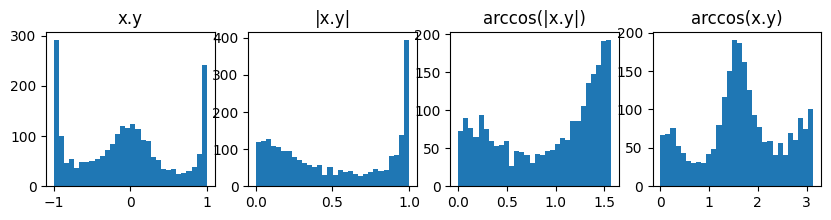

In [20]:
vecdot_hist(cmtocm[(y == 0)], budmaj[(y == 0)])
vecdot_hist(cmtocm[(y == 1)], budmaj[(y == 1)])

In [21]:
# vecdot_hist(cmtocm_sym[y == 0], budmaj[y == 0])
# vecdot_hist(cmtocm_sym[y == 1], budmaj[y == 1])

## Vector statistics


### Bud point


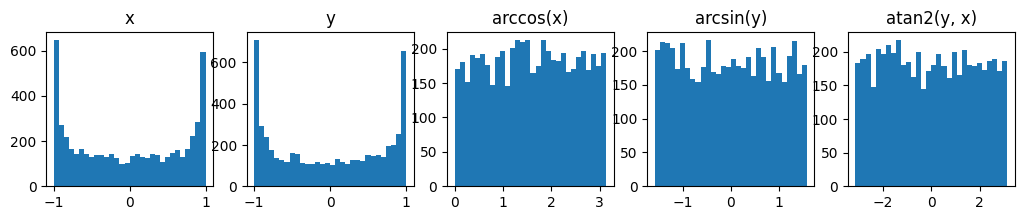

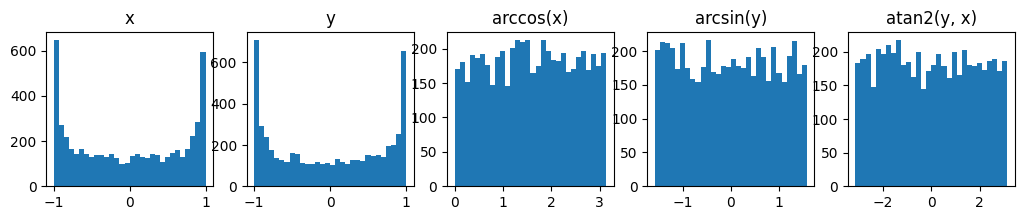

In [22]:
vec_hist(budpt)
vec_hist(budpt_sym)

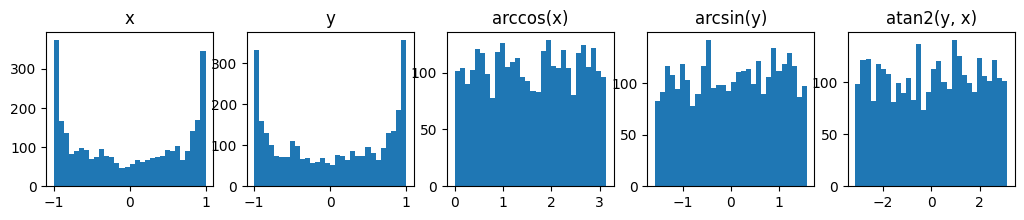

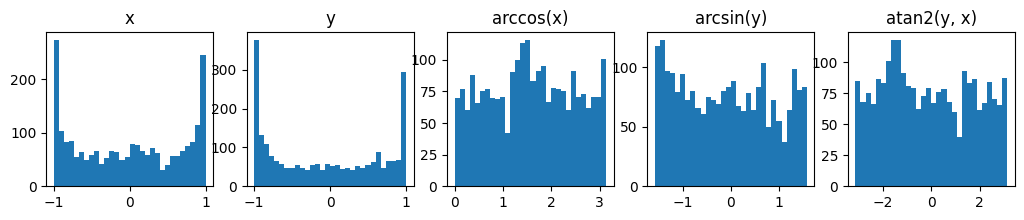

In [23]:
vec_hist(budpt[y == 0])
vec_hist(budpt[y == 1])

Expected uniform U[0, 2pi]

Suspicious for budding pairs


### CM to CM


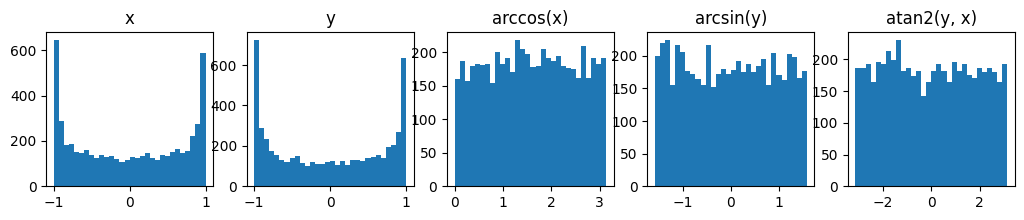

In [24]:
vec_hist(cmtocm)
# vec_hist(cmtocm_sym)

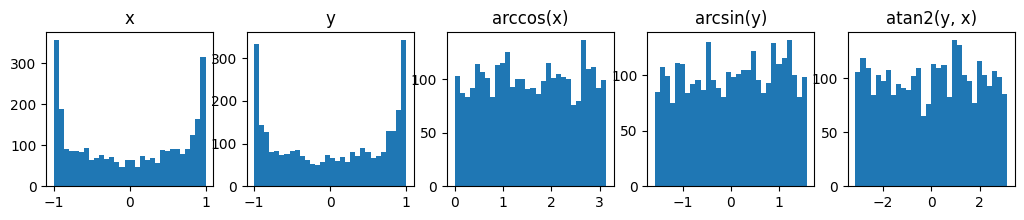

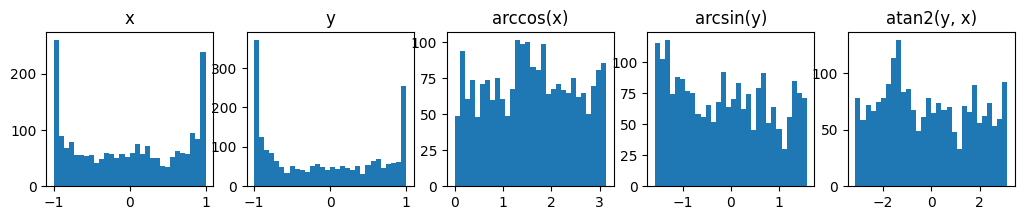

In [45]:
vec_hist(cmtocm[(y == 0) & (colony_ids != 5)])
vec_hist(cmtocm[(y == 1) & (colony_ids != 5)])

In [26]:
hist = torch.histogram(torch.atan2(
    cmtocm[y == 1, 1], cmtocm[y == 1, 0]), bins=30)
cmtocm_angle_mode = hist.bin_edges[hist.hist.argmax()]
cmtocm_angle_mode

tensor(-1.4656)

Expected uniform U[0, 2pi]

NOT OK : looks like there is a bias towards budding towards lower left (angle ~ 1.5 rad)


### Bud major axis


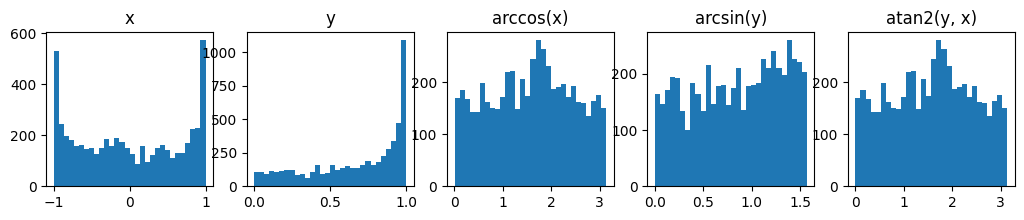

In [83]:
vec_hist(budmaj)

In [28]:
hist = torch.histogram(torch.atan2(budmaj[:, 1], budmaj[:, 0]), bins=30)
budmaj_angle_mode = hist.bin_edges[hist.hist.argmax()]
budmaj_angle_mode

tensor(1.6740)

In [29]:
cmtocm_angle_mode + torch.pi

tensor(1.6759)

cmtocm and budmaj are very aligned (nearly the same angle mod pi !!)

Parents tend to bud towards the lower left (angle ~ -1.5 rad), and since buds tend to grow outwards, this forces the bud major axis to be aligned along -1.5 rad

Similarly, the budpt also shows this same angle problem


Expected U[0, pi]

Not convincing due to the peak around angle ~ 2, but OK


## Candidate major axis


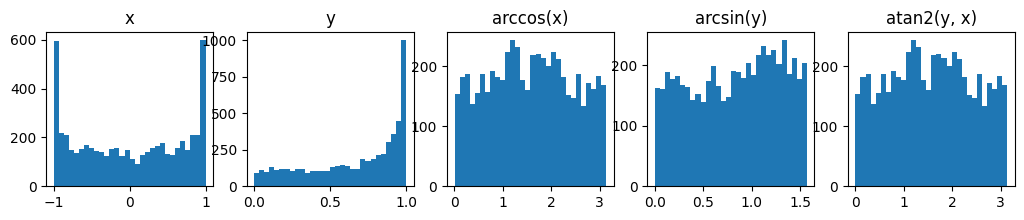

In [30]:
vec_hist(candmaj)

Expected U[0, pi]

OK


## Correlations


In [50]:
budmaj_angle = torch.atan2(budmaj[:, 1], budmaj[:, 0]).add_(0).fmod_(torch.pi)
candmaj_angle = torch.atan2(
    candmaj[:, 1], candmaj[:, 0]).add_(0).fmod_(torch.pi)
budpt_angle = torch.atan2(budpt[:, 1], budpt[:, 0]).add_(
    torch.pi).fmod_(torch.pi)
cmtocm_angle = torch.atan2(cmtocm[:, 1], cmtocm[:, 0]).add_(
    torch.pi).fmod_(torch.pi)

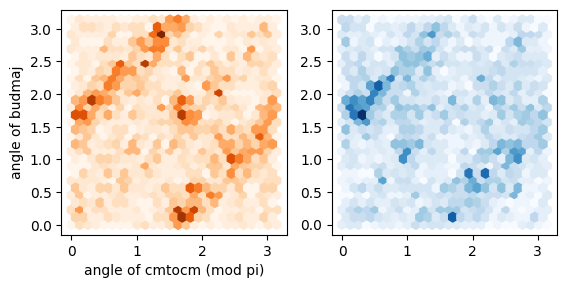

In [51]:
fig, ax = plt.subplots(ncols=2)

ax[0].hexbin(cmtocm_angle[y == 1].numpy(), budmaj_angle[y ==
             1].numpy(), cmap='Oranges', gridsize=25)
ax[1].hexbin(cmtocm_angle[y == 0].numpy(),
             budmaj_angle[y == 0].numpy(), cmap='Blues', gridsize=25)
ax[0].set_xlabel('angle of cmtocm (mod pi)')
ax[0].set_ylabel('angle of budmaj')
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

plt.show()

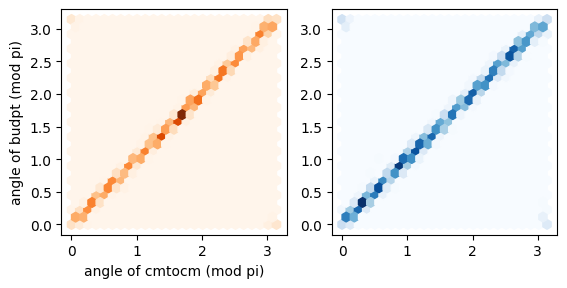

In [33]:
fig, ax = plt.subplots(ncols=2)

ax[0].hexbin(cmtocm_angle[y == 1].numpy(), budpt_angle[y ==
             1].numpy(), cmap='Oranges', gridsize=25)
ax[1].hexbin(cmtocm_angle[y == 0].numpy(),
             budpt_angle[y == 0].numpy(), cmap='Blues', gridsize=25)
ax[0].set_xlabel('angle of cmtocm (mod pi)')
ax[0].set_ylabel('angle of budpt (mod pi)')
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

plt.show()

## H0 statistics

Sanity check : verify that the uniform vector distributions have the correct shape


In [34]:
angles1 = torch.rand(10_000) * 2*torch.pi
xy1 = torch.vstack([torch.cos(angles1), torch.sin(angles1)]).T
xy1_sym = xy1.clone()
xy1_sym[xy1_sym[:, 1] < 0, :] = -xy1_sym[xy1_sym[:, 1] < 0, :]

angles2 = torch.rand(10_000) * 2*torch.pi
xy2 = torch.vstack([torch.cos(angles2), torch.sin(angles2)]).T
xy2_sym = xy2.clone()
xy2_sym[xy2_sym[:, 1] < 0, :] = -xy2_sym[xy2_sym[:, 1] < 0, :]

angles3 = torch.rand(10_000) * torch.pi
xy3 = torch.vstack([torch.cos(angles3), torch.sin(angles3)]).T

angles4 = torch.rand(10_000) * torch.pi
xy4 = torch.vstack([torch.cos(angles4), torch.sin(angles4)]).T

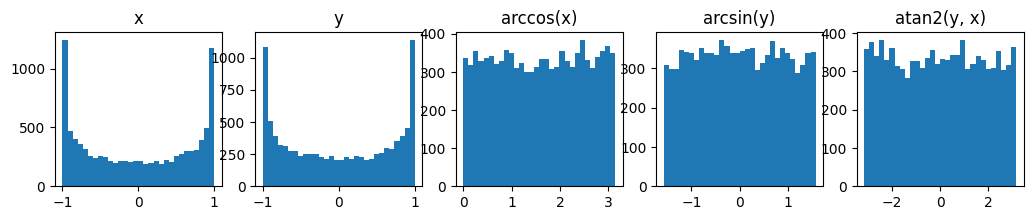

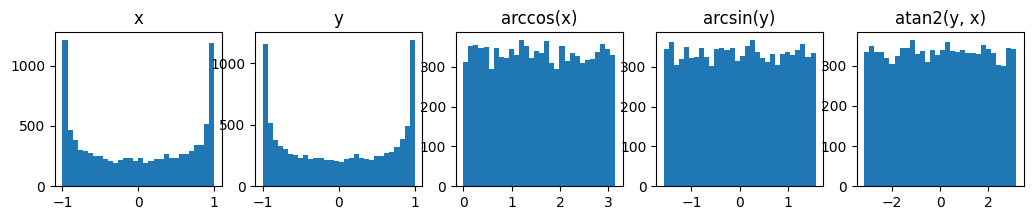

In [35]:
vec_hist(xy1)
vec_hist(xy2)

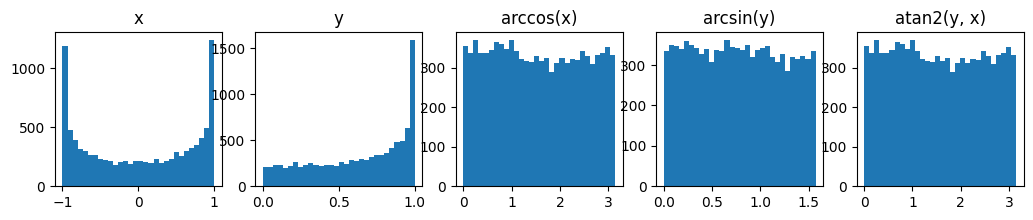

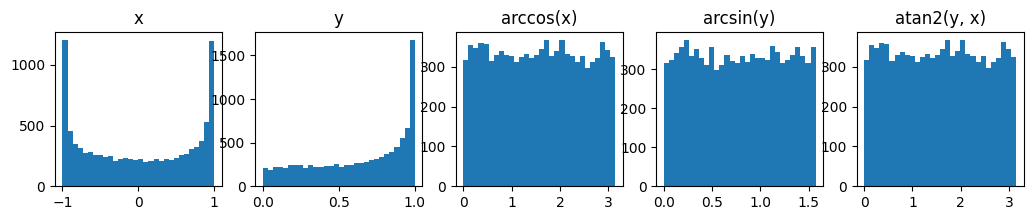

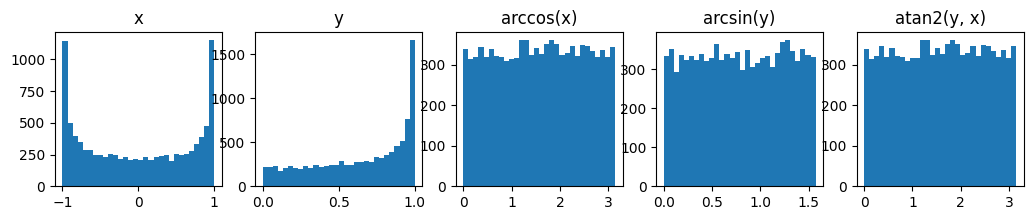

In [36]:
vec_hist(xy1_sym)
vec_hist(xy2_sym)
vec_hist(xy3)

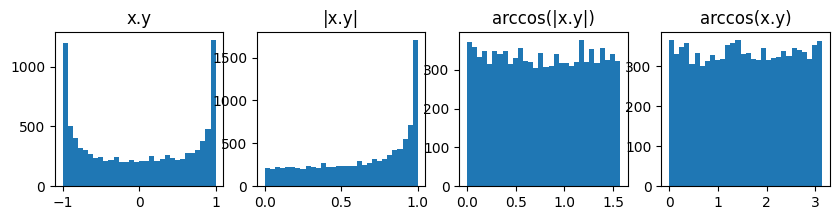

In [37]:
vecdot_hist(xy1, xy2)

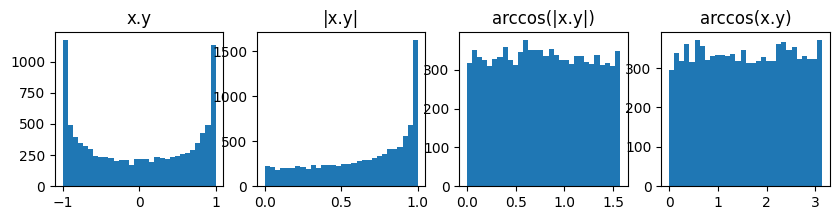

In [38]:
vecdot_hist(xy1, xy3)

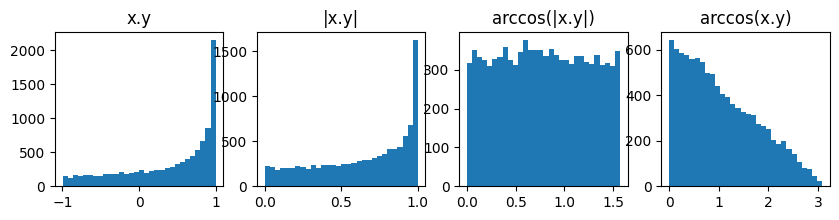

In [39]:
vecdot_hist(xy1_sym, xy3)

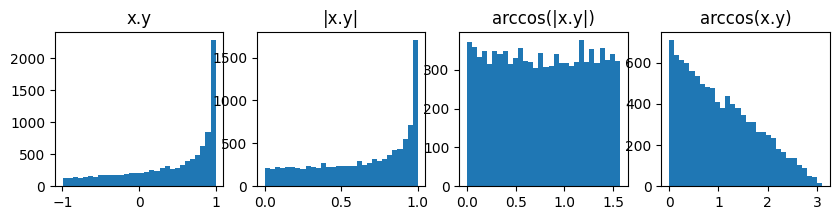

In [40]:
vecdot_hist(xy1_sym, xy2_sym)

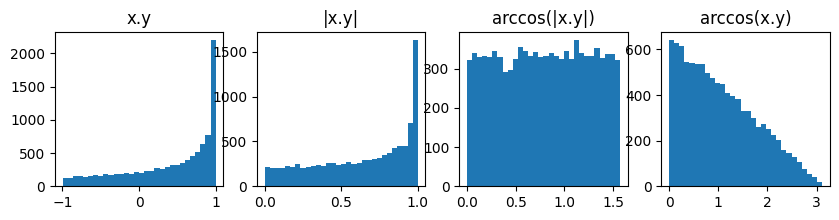

In [41]:
vecdot_hist(xy3, xy4)